In [19]:
import nltk
import pandas as pd
from collections import defaultdict

In [2]:
from nltk.tokenize import MWETokenizer

In [3]:
places = pd.read_csv("authorities.txt", sep='|')
places.head()

,AUTHORITY_ID,NCT_ID,AUTHORITY
0,173,NCT00000335,United States: Federal Government
1,174,NCT00000336,United States: Federal Government
2,175,NCT00000337,United States: Federal Government
3,176,NCT00000338,United States: Federal Government
4,177,NCT00000339,United States: Federal Government


In [27]:
places['AUTHORITY'].value_counts()[0:10]

United States: Food and Drug Administration                                                     49529
United States: Institutional Review Board                                                       44941
United States: Federal Government                                                               19383
Canada: Health Canada                                                                            7683
Germany: Federal Institute for Drugs and Medical Devices                                         6960
United Kingdom: Medicines and Healthcare Products Regulatory Agency                              5672
France: Afssaps - Agence française de sécurité sanitaire des produits de santé (Saint-Denis)     4663
Canada: Ethics Review Committee                                                                  3480
China: Food and Drug Administration                                                              3376
Germany: Ethics Commission                                                        

In [5]:
def apply_word_tokenize(x):
    """ Tokenize 
        :param: x (str)
        :return: token (list of str)
    """
    words = nltk.word_tokenize(x.lower())
    return words


In [6]:
tokens = [apply_word_tokenize(x) for x in places['AUTHORITY']]

In [25]:
len(tokens)

300994

In [13]:
#MWE = multi-word expression. re-groups phrases after regular tokenizing

tokenizer = MWETokenizer([('united', 'states'), ('united', 'kingdom'), ('federal', 'government')])

In [15]:
def apply_mwe_grouper(x):
    """ after tokenizing, find phrases 
        :param: x token (list of str)
        :return: token (list of str with combined str)"""
    grouped = tokenizer.tokenize(x)
    return grouped

In [16]:
grouped = [apply_mwe_grouper(x) for x in tokens]

In [26]:
len(grouped)

300994

In [35]:
grouped[200500:200505]

[['united_states', ':', 'food', 'and', 'drug', 'administration'],
 ['brazil', ':', 'ministry', 'of', 'health'],
 ['colombia', ':', 'national', 'institutes', 'of', 'health'],
 ['czech', 'republic', ':', 'state', 'institute', 'for', 'drug', 'control'],
 ['mexico', ':', 'ministry', 'of', 'health']]

In [30]:
for token in grouped[4500:4505]:
    if 'united_states' in token:
        print('yes')

yes
yes
yes
yes
yes


In [18]:
governments = {'United States': 'united_states', 'Germany': 'germany', 
               'Canada': 'canada', 'France': 'france',
              'United Kingdom': 'united_kingdom', 'China': 'china'}

In [36]:
counted = defaultdict(int)
    
for govt,label in governments.items():
    for token in grouped: 
        if label in token:
            counted[govt] +=1

In [37]:
usable = dict(counted)
usable

{'Canada': 12963,
 'China': 7650,
 'France': 14270,
 'Germany': 13389,
 'United Kingdom': 11155,
 'United States': 116347}

In [38]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels
%matplotlib inline

[None, None, None, None, None, None, None]

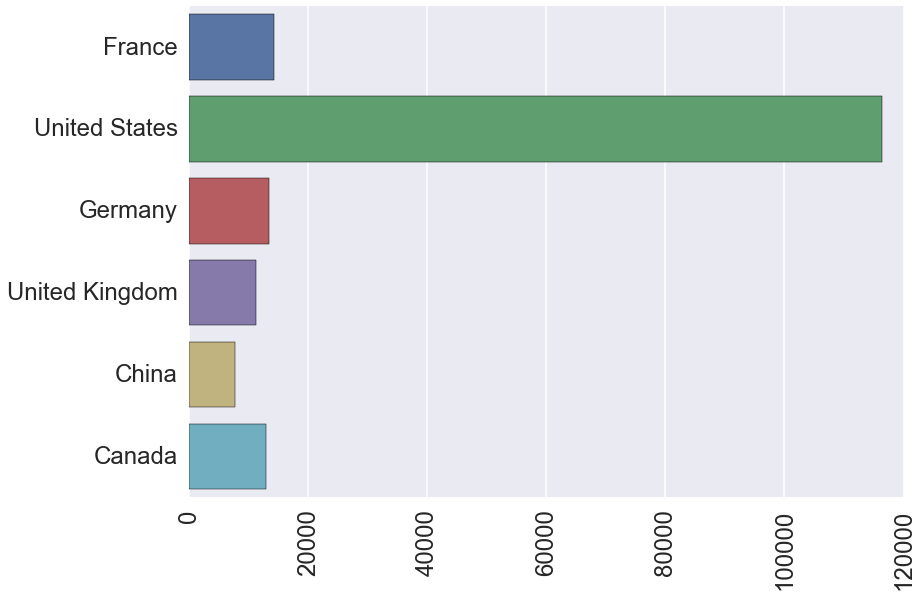

In [40]:
sns.set_context('poster', font_scale=1.5)
sns.barplot(list(usable.values()), list(usable.keys()))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [9]:
tokens[0:5]

[['united', 'states', ':', 'federal', 'government'],
 ['united', 'states', ':', 'federal', 'government'],
 ['united', 'states', ':', 'federal', 'government'],
 ['united', 'states', ':', 'federal', 'government'],
 ['united', 'states', ':', 'federal', 'government']]

In [3]:
conditions = pd.read_csv('conditions.txt', sep='|')
conditions.head()

,CONDITION_ID,NCT_ID,CONDITION
0,150,NCT00000262,Substance-Related Disorders
1,151,NCT00000263,Opioid-Related Disorders
2,152,NCT00000263,Substance-Related Disorders
3,153,NCT00000264,Opioid-Related Disorders
4,154,NCT00000264,Substance-Related Disorders


In [42]:
def tokenize_and_tag(x):
    """ Tokenize and identify parts of speech
        :param: x (str)
        :return: tuples of (word, POS)
    """
    words = nltk.word_tokenize(x.lower())
    tagged = nltk.pos_tag(words)
    return tuple(tagged)

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/szeitlin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/szeitlin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
conditions['tagged'] = [tokenize_and_tag(x) for x in conditions['CONDITION']]

In [45]:
conditions.head()

,CONDITION_ID,NCT_ID,CONDITION,tagged,taglen
0,150,NCT00000262,Substance-Related Disorders,"((substance-related, JJ), (disorders, NNS))",2
1,151,NCT00000263,Opioid-Related Disorders,"((opioid-related, JJ), (disorders, NNS))",2
2,152,NCT00000263,Substance-Related Disorders,"((substance-related, JJ), (disorders, NNS))",2
3,153,NCT00000264,Opioid-Related Disorders,"((opioid-related, JJ), (disorders, NNS))",2
4,154,NCT00000264,Substance-Related Disorders,"((substance-related, JJ), (disorders, NNS))",2


In [ ]:
# goal: aggregate & count conditions
# question: does it help at all to group by POS first?

In [ ]:
#could use lambda functions to split into additional columns (or map reduce)

In [59]:
takefirst = lambda x: x[0][0]

In [62]:
first_POS = lambda x: x[0][1]

In [63]:
conditions['firsttag'] = conditions['tagged'].apply(takefirst)

In [64]:
conditions['POS1'] = conditions['tagged'].apply(first_POS)

In [69]:
#aggregate by POS
grouped = conditions.groupby('POS1').count()

In [70]:
grouped.head(20)

,CONDITION_ID,NCT_ID,CONDITION,tagged,taglen,firsttag
POS1,,,,,,
(,24,24,24,24,24,24
:,27,27,27,27,27,27
CC,15,15,15,15,15,15
CD,103,103,103,103,103,103
DT,570,570,570,570,570,570
EX,22,22,22,22,22,22
FW,5,5,5,5,5,5
IN,362,362,362,362,362,362
JJ,131839,131839,131839,131839,131839,131839


In [79]:
conditions[conditions['POS1']=='JJR'].head()

,CONDITION_ID,NCT_ID,CONDITION,tagged,taglen,firsttag,POS1
13611,8912,NCT00005188,Tangier Disease,"((tangier, JJR), (disease, NN))",2,tangier,JJR
16339,13032,NCT00032864,Lower Extremity Ulcers,"((lower, JJR), (extremity, NN), (ulcers, NNS))",3,lower,JJR
23069,22164,NCT00070902,Lower Back Pain,"((lower, JJR), (back, RB), (pain, NN))",3,lower,JJR
28056,29106,NCT00111592,Lower Urinary Tract Symptoms,"((lower, JJR), (urinary, JJ), (tract, NN), (sy...",4,lower,JJR
28786,31261,NCT00153647,Lower Gastrointestinal Tract,"((lower, JJR), (gastrointestinal, JJ), (tract,...",3,lower,JJR


In [81]:
conditions[conditions['POS1']=='IN'].head()

,CONDITION_ID,NCT_ID,CONDITION,tagged,taglen,firsttag,POS1
8039,11599,NCT00006363,de Novo Myelodysplastic Syndromes,"((de, IN), (novo, FW), (myelodysplastic, JJ), ...",4,de,IN
8183,11417,NCT00014235,de Novo Myelodysplastic Syndromes,"((de, IN), (novo, FW), (myelodysplastic, JJ), ...",4,de,IN
10207,4663,NCT00002798,de Novo Myelodysplastic Syndromes,"((de, IN), (novo, FW), (myelodysplastic, JJ), ...",4,de,IN
11574,13871,NCT00008177,de Novo Myelodysplastic Syndromes,"((de, IN), (novo, FW), (myelodysplastic, JJ), ...",4,de,IN
13583,15608,NCT00027820,de Novo Myelodysplastic Syndrome,"((de, IN), (novo, FW), (myelodysplastic, JJ), ...",4,de,IN


In [80]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [82]:
POS_filter = ['JJ', 'JJR', 'NN', 'NNS', 'IN', 'RB']

In [86]:
filtered = conditions.filter(conditions, like=POS_filter)
filtered.head()

,CONDITION_ID,NCT_ID,CONDITION,tagged,taglen,firsttag,POS1
0,150,NCT00000262,Substance-Related Disorders,"((substance-related, JJ), (disorders, NNS))",2,substance-related,JJ
1,151,NCT00000263,Opioid-Related Disorders,"((opioid-related, JJ), (disorders, NNS))",2,opioid-related,JJ
2,152,NCT00000263,Substance-Related Disorders,"((substance-related, JJ), (disorders, NNS))",2,substance-related,JJ
3,153,NCT00000264,Opioid-Related Disorders,"((opioid-related, JJ), (disorders, NNS))",2,opioid-related,JJ
4,154,NCT00000264,Substance-Related Disorders,"((substance-related, JJ), (disorders, NNS))",2,substance-related,JJ


In [89]:
filtered['CONDITION'].value_counts()

Healthy                                                                                                     5634
Breast Cancer                                                                                               4059
Obesity                                                                                                     3449
HIV Infections                                                                                              2993
Hypertension                                                                                                2400
Asthma                                                                                                      2259
Prostate Cancer                                                                                             2142
Pain                                                                                                        2031
Schizophrenia                                                                                   

In [88]:
filtered['firsttag'].value_counts()

stage               9722
healthy             7881
chronic             6717
recurrent           5955
diabetes            5694
breast              5082
hiv                 4839
acute               4365
obesity             3595
type                3511
coronary            3420
heart               3189
adult               3020
multiple            2704
hypertension        2628
pain                2570
lung                2503
prostate            2339
asthma              2337
cardiovascular      2335
colorectal          2200
metastatic          2078
cancer              2055
lymphoma            2046
hepatitis           1925
depression          1902
leukemia            1897
pulmonary           1895
schizophrenia       1882
ovarian             1664
                    ... 
sickle-cell            1
atiii                  1
bifidobacterium        1
operational            1
cerebrolysin           1
atl                    1
operations             1
non-culprit            1
h1n1/influenza         1


In [94]:
#flatten & do FreqDist of tag words?
#would like to look at roots & overlapping parts, e.g. 'neuro' anything, 'depress' anything
import itertools
flatten1 = itertools.chain.from_iterable
flattened = [x for x in flatten1(flatten1(filtered['tagged']))]

In [97]:
counts = nltk.FreqDist(flattened)

In [103]:
import operator
sortbycounts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)

In [105]:
sortbycounts[0:15]

[('NN', 512908),
 ('JJ', 210245),
 ('NNS', 61568),
 (',', 42460),
 ('cancer', 32098),
 ('IN', 19573),
 ('disease', 17915),
 ('(', 15392),
 (')', 15374),
 ('stage', 11317),
 ('cell', 10922),
 ('lymphoma', 10346),
 ('CD', 10081),
 ('of', 9964),
 ('chronic', 9624)]

In [110]:
words = list(set([x for x in flattened if len(x) > 3]))
words[0:10]

['with',
 'inactivity/low',
 'rankl',
 'baseline',
 'agent-related',
 'fistulas',
 'mucosa-associated',
 'minimum',
 'cpt1',
 'erythroleukemia']

In [116]:
nltk.FreqDist([x for x in flattened if len(x) > 3])

FreqDist({'rankl': 1,
          'baseline': 5,
          'agent-related': 16,
          'fistulas': 15,
          'mucosa-associated': 139,
          'cpt1': 1,
          'medication-overuse': 1,
          'vte-related': 1,
          'phlebotomy': 5,
          'nonexudative': 4,
          'failure': 4160,
          'cholangiocarcinoma': 186,
          'adrenomyeloneuropathy': 4,
          'tenofovir': 2,
          'lying': 1,
          'synechiae': 3,
          'ill-sustained': 1,
          'tonic-clonic': 16,
          'pull-up': 1,
          'vagal': 5,
          'imatinib': 9,
          'varicella': 70,
          'holoprosencephaly': 2,
          'scid': 8,
          'mouth': 114,
          'groups': 16,
          'discomfort': 39,
          'non-albicans': 1,
          'vesicoureteral': 13,
          'stigmata': 1,
          'gene/fusion': 1,
          'lite': 1,
          'roux-': 1,
          'pachymetry': 1,
          'processing': 18,
          'pressor': 1,
          'stress-r

In [111]:
from nltk.stem.snowball import SnowballStemmer

In [112]:
stemmer = SnowballStemmer('english')

In [114]:
print(stemmer.stem('depressive'))  #great

depress


In [115]:
print(stemmer.stem('mucosa-associated')) #stupid

mucosa-associ


In [22]:
milestones = pd.read_csv('results_partflow_mlstn.txt', sep='|')
milestones.head()

,MILESTONE_ID,PARTICIPANT_FLOW_ID,MILESTONE_TYPE,MILESTONE_TITLE
0,41,81,Milestone,STARTED
1,42,81,Milestone,COMPLETED
2,43,81,Milestone,NOT COMPLETED
3,44,82,Milestone,STARTED
4,45,82,Milestone,COMPLETED


In [35]:
milestones['tagged'] = [tokenize_and_tag(x) for x in milestones['MILESTONE_TITLE']]

In [36]:
milestones.head()

,MILESTONE_ID,PARTICIPANT_FLOW_ID,MILESTONE_TYPE,MILESTONE_TITLE,tagged,taglen
0,41,81,Milestone,STARTED,"[(started, VBN)]",1
1,42,81,Milestone,COMPLETED,"[(completed, VBN)]",1
2,43,81,Milestone,NOT COMPLETED,"[(not, RB), (completed, VBN)]",2
3,44,82,Milestone,STARTED,"[(started, VBN)]",1
4,45,82,Milestone,COMPLETED,"[(completed, VBN)]",1


In [28]:
milestones['taglen'] = [len(x) for x in milestones['tagged']]

In [30]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/szeitlin/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [37]:
nltk.help.upenn_tagset('VBN') #note that all-caps words were assumed to be proper nouns!

VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
